In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
port = pd.read_csv('por_clean.csv')
port.head()

,sex,address,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,...,health,absences,G1,G2,G3,guardian_mother,guardian_other,failures_1,failures_2,failures_3
0,0,0,1,1,0.333333,0.333333,1,0,0,0,...,0.5,0.043011,0,0,0,1,0,0,0,0
1,0,0,1,0,0.000000,0.333333,0,1,0,0,...,0.5,0.021505,0,0,0,0,0,0,0,0
2,0,0,0,0,0.000000,0.333333,1,0,0,0,...,0.5,0.064516,1,1,1,1,0,0,0,0
3,0,0,1,0,0.000000,0.666667,0,1,0,1,...,1.0,0.000000,1,1,1,1,0,0,0,0
4,0,0,1,0,0.000000,0.333333,0,1,0,0,...,1.0,0.000000,0,1,1,0,0,0,0,0


In [3]:
port['Grade_dif']=port.G2-port.G1
port.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'guardian_mother', 'guardian_other',
       'failures_1', 'failures_2', 'failures_3', 'Grade_dif'],
      dtype='object')

# Gaussian Model

In [4]:
X_trn, X_tst, y_trn, y_tst = train_test_split(port.drop('G3', axis=1), port.G3, test_size=0.33, random_state=9)

In [5]:
len(X_trn), len(X_tst), len(y_trn), len(y_tst)

(434, 215, 434, 215)

In [6]:
model = GaussianNB()

In [7]:
model.fit(X_trn, y_trn)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
p1 = model.predict(X_tst)

In [9]:
a = accuracy_score(y_tst, p1)
a

0.7209302325581395

In [10]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, port.drop(['G3'], axis=1), port.G3, cv=5)
np.mean(scores)

0.9383054072384802

In [11]:
scores = cross_val_score(model, port.drop(['G3'], axis=1), port.G3, cv=4)
np.mean(scores)

0.71813224267212

### Without G1 & G2

In [12]:
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(port.drop(['G1', 'G2', 'G3'], axis=1), port.G3, test_size=0.33, random_state=9)

In [13]:
model = GaussianNB()

In [14]:
model.fit(X_trn2, y_trn2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
p = model.predict(X_tst2)

In [16]:
a = accuracy_score(y_tst2, p)
a

0.7116279069767442

In [17]:
scores = cross_val_score(model, port.drop(['G3','G1', 'G2'], axis=1), port.G3, cv=5)
np.mean(scores)

0.7074445005849231

## Some features

In [18]:
port.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'guardian_mother', 'guardian_other',
       'failures_1', 'failures_2', 'failures_3', 'Grade_dif'],
      dtype='object')

In [19]:
features = ['famsup', 'studytime', 'nursery', 'Pstatus', 'activities']

In [20]:
X_trn3, X_tst3, y_trn3, y_tst3 = train_test_split(port[features], port.G3, test_size=0.33, random_state=9)

In [21]:
model = GaussianNB()

In [22]:
model.fit(X_trn3, y_trn3)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
p = model.predict(X_tst3)

In [24]:
a = accuracy_score(y_tst3, p)
a

0.5720930232558139

In [25]:
scores = cross_val_score(clf, port[features], port.G3, cv=5)
np.mean(scores)

0.6086479400237611

### Other features

In [26]:
features = ['Grade_dif', 'higher', 'Pstatus']

In [27]:
X_trn3, X_tst3, y_trn3, y_tst3 = train_test_split(port[features], port.G3, test_size=0.33, random_state=7)
model = GaussianNB()
model.fit(X_trn3, y_trn3)
p = model.predict(X_tst3)
a = accuracy_score(y_tst3, p)
a

0.627906976744186

In [28]:
scores = cross_val_score(clf, port[features], port.G3, cv=5)
np.mean(scores)

0.6256304651617984

## Without G1, G2 & sex

In [29]:
X_trn4, X_tst4, y_trn4, y_tst4 = train_test_split(port.drop(['G1', 'G2', 'G3', 'sex'], axis=1), port.G3, test_size=0.33, random_state=9)

In [30]:
model = GaussianNB()

In [31]:
model.fit(X_trn4, y_trn4)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
p = model.predict(X_tst4)

In [33]:
a = accuracy_score(y_tst4, p)
a

0.7116279069767442

# Random Forest

In [34]:
clf = RandomForestClassifier(random_state=9)

In [35]:
clf.fit(X_trn, y_trn)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [36]:
p2 = clf.predict(X_tst)

In [37]:
a = accuracy_score(y_tst, p2)
a

0.9674418604651163

In [38]:
scores = cross_val_score(clf, port.drop(['G3'], axis=1), port.G3, cv=5)
np.mean(scores)

0.9229910736638945

### Without G1 & G2

In [39]:
clf.fit(X_trn2, y_trn2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [40]:
p = clf.predict(X_tst2)

In [41]:
a = accuracy_score(y_tst2, p)
a

0.6976744186046512

In [42]:
scores = cross_val_score(clf, port.drop(['G1','G2','G3'], axis=1), port.G3, cv=8)
np.mean(scores)

0.6887439777175549

# KNeighbors Classifier

In [43]:
kmodel = KNeighborsClassifier()

In [44]:
kmodel.fit(X_trn, y_trn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
p3 = kmodel.predict(X_tst)

In [46]:
a = accuracy_score(y_tst, p3)
a

0.9348837209302325

In [47]:
scores = cross_val_score(kmodel, port.drop(['G3'], axis=1), port.G3, cv=5)
np.mean(scores) 

0.9276066403565073

## Without G1 &G2

In [48]:
kmodel.fit(X_trn2, y_trn2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
p = kmodel.predict(X_tst2)

In [50]:
a = accuracy_score(y_tst2, p)
a

0.6093023255813953

In [51]:
scores = cross_val_score(kmodel, port.drop(['G1','G2','G3'], axis=1), port.G3, cv=8)
np.mean(scores) 

0.6609431458897923

## Some features

In [52]:
features = ['sex', 'studytime', 'traveltime', 'Pstatus', 'famsize','address', 
       'higher', 'activities', 'paid', 'schoolsup', 
       'Walc', 'goout', 'internet', 'failures_1']

In [53]:
X_trn3, X_tst3, y_trn3, y_tst3 = train_test_split(port[features], port.G3, test_size=0.33, random_state=9)

In [54]:
kmodel.fit(X_trn3, y_trn3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
p = kmodel.predict(X_tst3)

In [56]:
a = accuracy_score(y_tst3, p)
a

0.7255813953488373

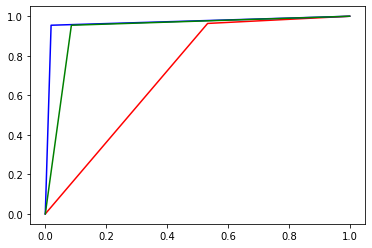

In [62]:
x, y, _ = roc_curve(y_tst, p1)
plt.plot(x,y,'r')
x, y, _ = roc_curve(y_tst, p2)
plt.plot(x,y, 'b')
x, y, _ = roc_curve(y_tst, p3)
plt.plot(x,y, 'g')

In [60]:
from sklearn.metrics import confusion_matrix
df_confussion = confusion_matrix(y_tst, p3)
df_confussion

array([[ 96,   9],
       [  5, 105]])

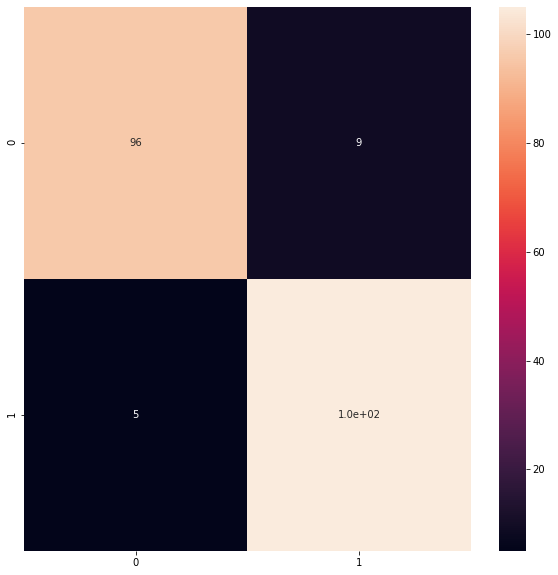

In [61]:
import seaborn as sns
#array = df_confussion

df_cm = pd.DataFrame(df_confussion)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)